In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(23)

In [4]:
#Setup for kaggle
from google.colab import drive
drive.mount('/content/drive') #Connecting to drive
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
import os
#Downloading kaggle dataset
os.environ['KAGGLE_USERNAME'] = 'kaggle_uesrname' #Replace with your details
os.environ["key"]= 'your_kaggle_key'
#api for the dataset
!kaggle competitions download -c digit-recognizer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 85% 13.0M/15.3M [00:01<00:00, 15.2MB/s]
100% 15.3M/15.3M [00:01<00:00, 9.33MB/s]


In [5]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


#Loading data

In [6]:
#Loading data
path = '/content/train.csv'
df = pd.read_csv(path)

In [7]:
df.shape

(42000, 785)

In [8]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.isnull().sum().any() #checking for null values

False

#Preprocess for RandomForestClassifier

In [10]:
X = df.drop('label',axis=1) #Training data
Y = df['label'] #Target

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state= 5,test_size=0.3)

#Model: RandomForestClassifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [14]:
%%time
rfc_model = RandomForestClassifier(n_estimators =55,random_state=5,verbose=1)
result_rfc = rfc_model.fit(x_train,y_train) #Training Model 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 10.1 s, sys: 39.8 ms, total: 10.2 s
Wall time: 10.2 s


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   10.1s finished


In [15]:
y_hat = rfc_model.predict(x_test)
accuracy = accuracy_score(y_hat,y_test)
accuracy

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.2s finished


0.9595238095238096

In [16]:
#pickle.dump(rfc_model,open('/content/drive/MyDrive/Projects/Digit Recognization/rfc_model.pkl','wb'))

#Preprocess for CNN

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state= 5,test_size=0.2)

In [18]:
x_train = np.array(x_train).reshape(-1,28,28)
x_train[0].shape

(28, 28)

In [19]:
x_train = x_train/ 255

In [20]:
x_test = np.array(x_test).reshape(-1,28,28)
x_test = x_test/ 255

#Model: CNN

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [22]:
input_size = [28,28,1]

In [23]:
early_stop = EarlyStopping(monitor ='val_accuracy',patience = 10,verbose= 1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

In [24]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',padding= 'same',input_shape = input_size))
model.add(MaxPooling2D())
model.add(Conv2D(64,kernel_size=3,activation='relu',padding= 'same'))
model.add(MaxPooling2D())
model.add(Conv2D(256,kernel_size=3,activation='relu',padding= 'same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(120,activation= 'relu'))
model.add(Dense(10,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [25]:
%%time
his1 = model.fit(x_train,y_train,epochs=100,verbose=1,batch_size=500,validation_split=0.2,callbacks=[early_stop,checkpoint])

Epoch 1/100
54/54 [==============================] - 13s 38ms/step - loss: 0.7603 - accuracy: 0.7812 - val_loss: 0.1918 - val_accuracy: 0.9418
Epoch 2/100
54/54 [==============================] - 1s 20ms/step - loss: 0.1406 - accuracy: 0.9574 - val_loss: 0.1077 - val_accuracy: 0.9664
Epoch 3/100
54/54 [==============================] - 1s 21ms/step - loss: 0.0850 - accuracy: 0.9743 - val_loss: 0.0849 - val_accuracy: 0.9737
Epoch 4/100
54/54 [==============================] - 1s 19ms/step - loss: 0.0610 - accuracy: 0.9814 - val_loss: 0.0592 - val_accuracy: 0.9796
Epoch 5/100
54/54 [==============================] - 1s 20ms/step - loss: 0.0487 - accuracy: 0.9853 - val_loss: 0.0521 - val_accuracy: 0.9829
Epoch 6/100
54/54 [==============================] - 1s 20ms/step - loss: 0.0434 - accuracy: 0.9862 - val_loss: 0.0432 - val_accuracy: 0.9860
Epoch 7/100
54/54 [==============================] - 1s 19ms/step - loss: 0.0308 - accuracy: 0.9907 - val_loss: 0.0491 - val_accuracy: 0.9848
Epoch

In [26]:
from keras.models import load_model
loaded_model = load_model('/content/best_model.h5')

In [27]:
y_hat = np.argmax(loaded_model.predict(x_test),axis=1)
accuracy = accuracy_score(y_hat,y_test)
accuracy

263/263 [==============================] - 1s 2ms/step


0.9894047619047619

#Testing


Prediction: 7


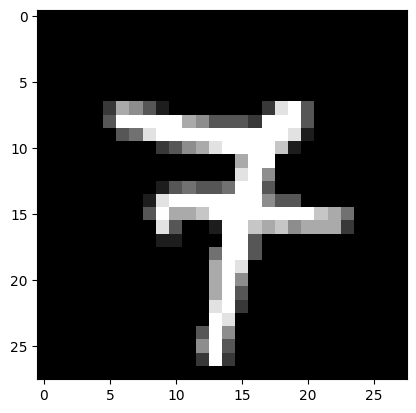

In [28]:
i = 145
plt.imshow(x_test[i],cmap= 'gray')
print("Prediction:",y_hat[i])

#Predicting and Submitting to Kaggle

In [29]:
test = pd.read_csv('/content/test.csv')
test.shape

(28000, 784)

In [30]:
sub = pd.read_csv('/content/sample_submission.csv')
sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [31]:
test = np.array(test).reshape(-1,28,28)

In [32]:
submit = pd.DataFrame()
submit['ImageId'] = np.linspace(1,28000,28000,dtype = int)

In [33]:
predictions =np.argmax(loaded_model.predict(test),axis=1)
predictions.shape

875/875 [==============================] - 2s 2ms/step


(28000,)

Prediction: 6


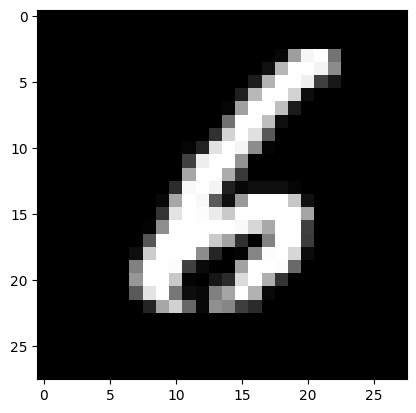

In [34]:
i = 153
plt.imshow(test[i],cmap= 'gray')
print("Prediction:",predictions[i])

In [35]:
submit['Label'] = predictions

In [36]:
submit.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [38]:
submission = submit.to_csv('/content/submission.csv',index= False)

In [ ]:
#!kaggle competitions submit -c digit-recognizer -f submission.csv -m "Message"

100% 416k/416k [00:25<00:00, 16.4kB/s]
Successfully submitted to Digit Recognizer